In [2]:
import pandas as pd
import pandas as pd
import re
import openpyxl
import datetime
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import decimal
import os
import sys
# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *


# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet(TEPLOTY_SK_DIR + 'teploty_sk.parquet'   )

print(df.head())
tf = df[df.Stanica =='Brezno']

                Stanica  Teplota Smer  Rýchlosť Nárazy    Tlak Oblačnosť  \
49       Oravské Veselé     20.9    Z       2.0   None     NaN      None   
25               Košice     22.8   SZ       3.0   None  1013.6   Oblačno   
26  Košice - Podhradová     24.1   SV       2.0   None  1013.2      None   
27    Kráľova pri Senci     24.3    Z       3.0   None     NaN      None   
28       Kremnické Bane     20.2   SZ       2.0   None     NaN      None   

   Počasie  Graf             Cas_CET              file  
49    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
25    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
26    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
27    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
28    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  


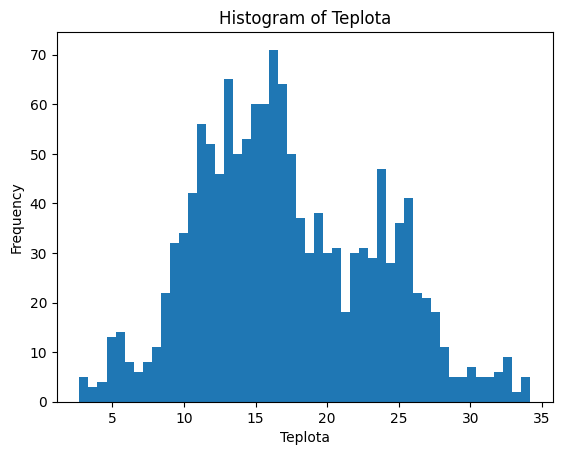

In [3]:
import matplotlib.pyplot as plt
plt.hist(tf.Teplota, bins=50)
plt.xlabel('Teplota')
plt.ylabel('Frequency')
plt.title('Histogram of Teplota')
plt.show()

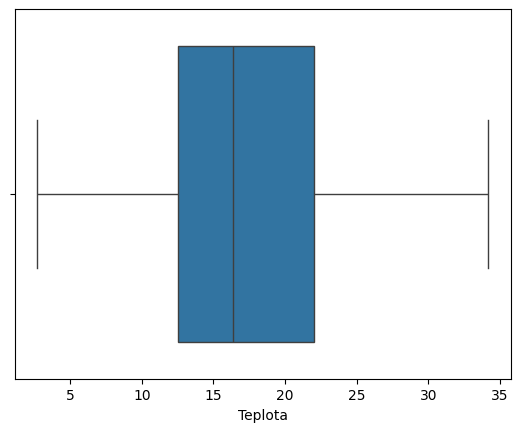

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(x=tf['Teplota'].astype(float))
plt.show()

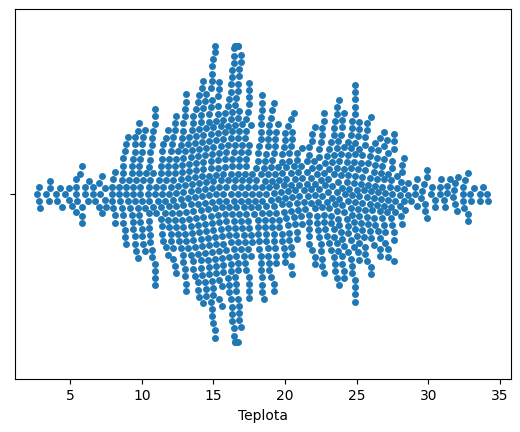

In [5]:
sns.swarmplot(x=tf['Teplota'].astype(float).head(1000))
plt.show()

In [6]:
data=tf.sort_values(by=['Cas_CET'])
data['Teplota'] = data['Teplota'].astype(float)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, 8 to 8
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    1376 non-null   object        
 1   Teplota    1376 non-null   float64       
 2   Smer       1375 non-null   object        
 3   Rýchlosť   1375 non-null   float64       
 4   Nárazy     0 non-null      object        
 5   Tlak       1374 non-null   float64       
 6   Oblačnosť  0 non-null      object        
 7   Počasie    0 non-null      object        
 8   Graf       0 non-null      float64       
 9   Cas_CET    1376 non-null   datetime64[us]
 10  file       1376 non-null   object        
dtypes: datetime64[us](1), float64(4), object(6)
memory usage: 129.0+ KB


,Teplota,Rýchlosť,Tlak,Graf,Cas_CET
count,1376.000000,1375.000000,1374.000000,0.0,1376
mean,17.156468,1.016000,1017.301164,NaN,2025-08-28 03:13:25.813953
min,2.700000,0.000000,1005.000000,NaN,2025-07-30 14:00:00
25%,12.500000,0.000000,1013.700000,NaN,2025-08-13 18:45:00
50%,16.350000,1.000000,1017.700000,NaN,2025-08-28 03:30:00
75%,22.025000,1.000000,1020.275000,NaN,2025-09-11 12:15:00
max,34.200000,4.000000,1030.000000,NaN,2025-09-25 21:00:00
std,6.227210,0.823441,5.026150,NaN,NaN


In [7]:
df.Teplota = df.Teplota.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135439 entries, 49 to 97
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Stanica    135439 non-null  object        
 1   Teplota    135439 non-null  float64       
 2   Smer       133932 non-null  object        
 3   Rýchlosť   133549 non-null  float64       
 4   Nárazy     1614 non-null    object        
 5   Tlak       54685 non-null   float64       
 6   Oblačnosť  20823 non-null   object        
 7   Počasie    3303 non-null    object        
 8   Graf       0 non-null       float64       
 9   Cas_CET    135439 non-null  datetime64[us]
 10  file       135439 non-null  object        
dtypes: datetime64[us](1), float64(4), object(6)
memory usage: 12.4+ MB


In [8]:
df.index.unique()

Index([49, 25, 26, 27, 28, 29, 30, 31, 32, 33, 24, 34, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 35, 45, 23, 21,  1,  2,  3,  4,  5,  6,  7,  8,  9, 22, 10,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 11, 46, 47, 48, 75, 76, 77, 78, 79,
       80, 81, 82, 83, 74, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 85, 73, 72,
       71, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70,  0, 95, 96, 97, 98],
      dtype='int64')

In [9]:
data=df.loc[['Dudince', 'Žilina','Chopok'],['Teplota','datetime']]
data=df.loc[['Dudince', 'Chopok'],['Teplota','datetime']]

plt.figure(figsize=(25, 10))
plt.plot(data['datetime'], data['Teplota'],marker='o', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Teplota')
plt.title('Teplota over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.size=(150, 10)
plt.show()

KeyError: "None of [Index(['Dudince', 'Žilina', 'Chopok'], dtype='object')] are in the [index]"

In [ ]:
plt.size

In [ ]:
dir(decimal)
